In [112]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [113]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [114]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7287,7790_02,Mars,False,F/1490/S,55 Cancri e,45.0,False,810.0,0.0,132.0,198.0,0.0,Wifel Casty,False
4724,5040_01,Europa,False,C/195/S,TRAPPIST-1e,26.0,False,0.0,21.0,10424.0,1373.0,7218.0,Enibik Dynigic,False
5584,5949_01,Mars,False,D/180/S,TRAPPIST-1e,19.0,False,758.0,425.0,0.0,0.0,0.0,Cin Shbre,False
3159,3406_02,Europa,False,C/112/P,TRAPPIST-1e,55.0,False,0.0,5971.0,158.0,4125.0,1984.0,Dyonevi Metiveal,False
3674,3946_01,Mars,False,F/812/P,TRAPPIST-1e,37.0,False,14.0,0.0,91.0,1203.0,0.0,Lles Parta,False


In [115]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

display_missing(df)

PassengerId column missing values: 0
HomePlanet column missing values: 201
CryoSleep column missing values: 217
Cabin column missing values: 199
Destination column missing values: 182
Age column missing values: 179
VIP column missing values: 203
RoomService column missing values: 181
FoodCourt column missing values: 183
ShoppingMall column missing values: 208
Spa column missing values: 183
VRDeck column missing values: 188
Name column missing values: 200
Transported column missing values: 0




In [116]:
# HomePlanet, af te leiden van waar groepsgenoten ook vandaan komen?
# CryoSleep, If TotalSpend > 0, geen CryoSleep
# Cabin, af te leiden van medereizigers?
# Destination af te leiden van medereizigers? 
#  




#### Nieuwe Features

In [117]:
#Turn missing spends into 0 ( misschien niet beste optie)

df['RoomService'] = df['RoomService'].apply(lambda s: s if pd.notnull(s) else 0)
df['FoodCourt'] = df['FoodCourt'].apply(lambda s: s if pd.notnull(s) else 0)
df['ShoppingMall'] = df['ShoppingMall'].apply(lambda s: s if pd.notnull(s) else 0)
df['Spa'] = df['Spa'].apply(lambda s: s if pd.notnull(s) else 0)
df['VRDeck'] = df['VRDeck'].apply(lambda s: s if pd.notnull(s) else 0)

# Total Spend

df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df.sample(5)

# Extract Board and Deck from Cabin

df['Board'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'NA')
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'NA')
# Extract GroupId from first part of PassengerId
df['GroupId'] = df['PassengerId'].apply(lambda s: s[:4] if pd.notnull(s) else 'NA')
# Get group size per group, dit kan beter, duurt best lang (17 sec) om te runnen op deze manier 

df['GroupSize'] = df['GroupId'].apply(lambda s: np.count_nonzero(df['GroupId'] == s))



# Space Titanic

### Variables

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.


**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

4378 of 8693 passengers transported and it is the 50.36% of the training set.
4315 of 8693 passengers not transported and it is the 49.64% of the training set.


c:\Users\Laptop Anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


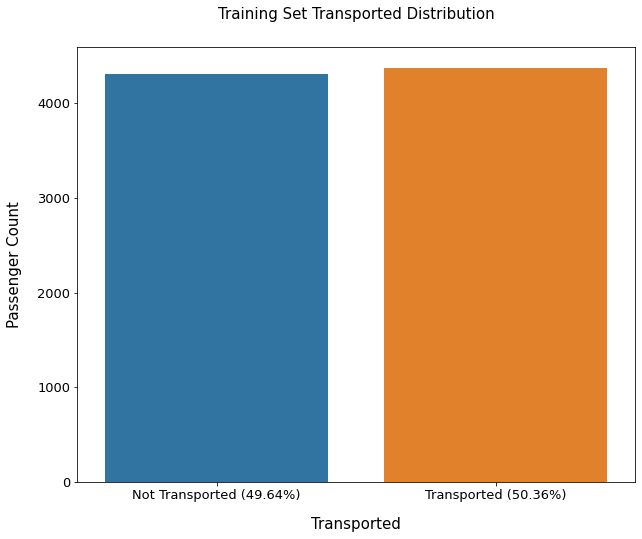

In [118]:
transported = df['Transported'].value_counts()[1]
not_transported = df['Transported'].value_counts()[0]
transported_per = transported / df.shape[0] * 100
not_transported_per = not_transported / df.shape[0] * 100

print('{} of {} passengers transported and it is the {:.2f}% of the training set.'.format(transported, df.shape[0], transported_per))
print('{} of {} passengers not transported and it is the {:.2f}% of the training set.'.format(not_transported, df.shape[0], not_transported_per))

plt.figure(figsize=(10, 8))
sns.countplot(df['Transported'])

plt.xlabel('Transported', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Transported ({0:.2f}%)'.format(not_transported_per), 'Transported ({0:.2f}%)'.format(transported_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Transported Distribution', size=15, y=1.05)

plt.show()

In [119]:
# A large proportion of people in CryoSleep are Transported

df.groupby(['CryoSleep','Transported'])['Transported'].count()

CryoSleep  Transported
False      False          3650
           True           1789
True       False           554
           True           2483
Name: Transported, dtype: int64

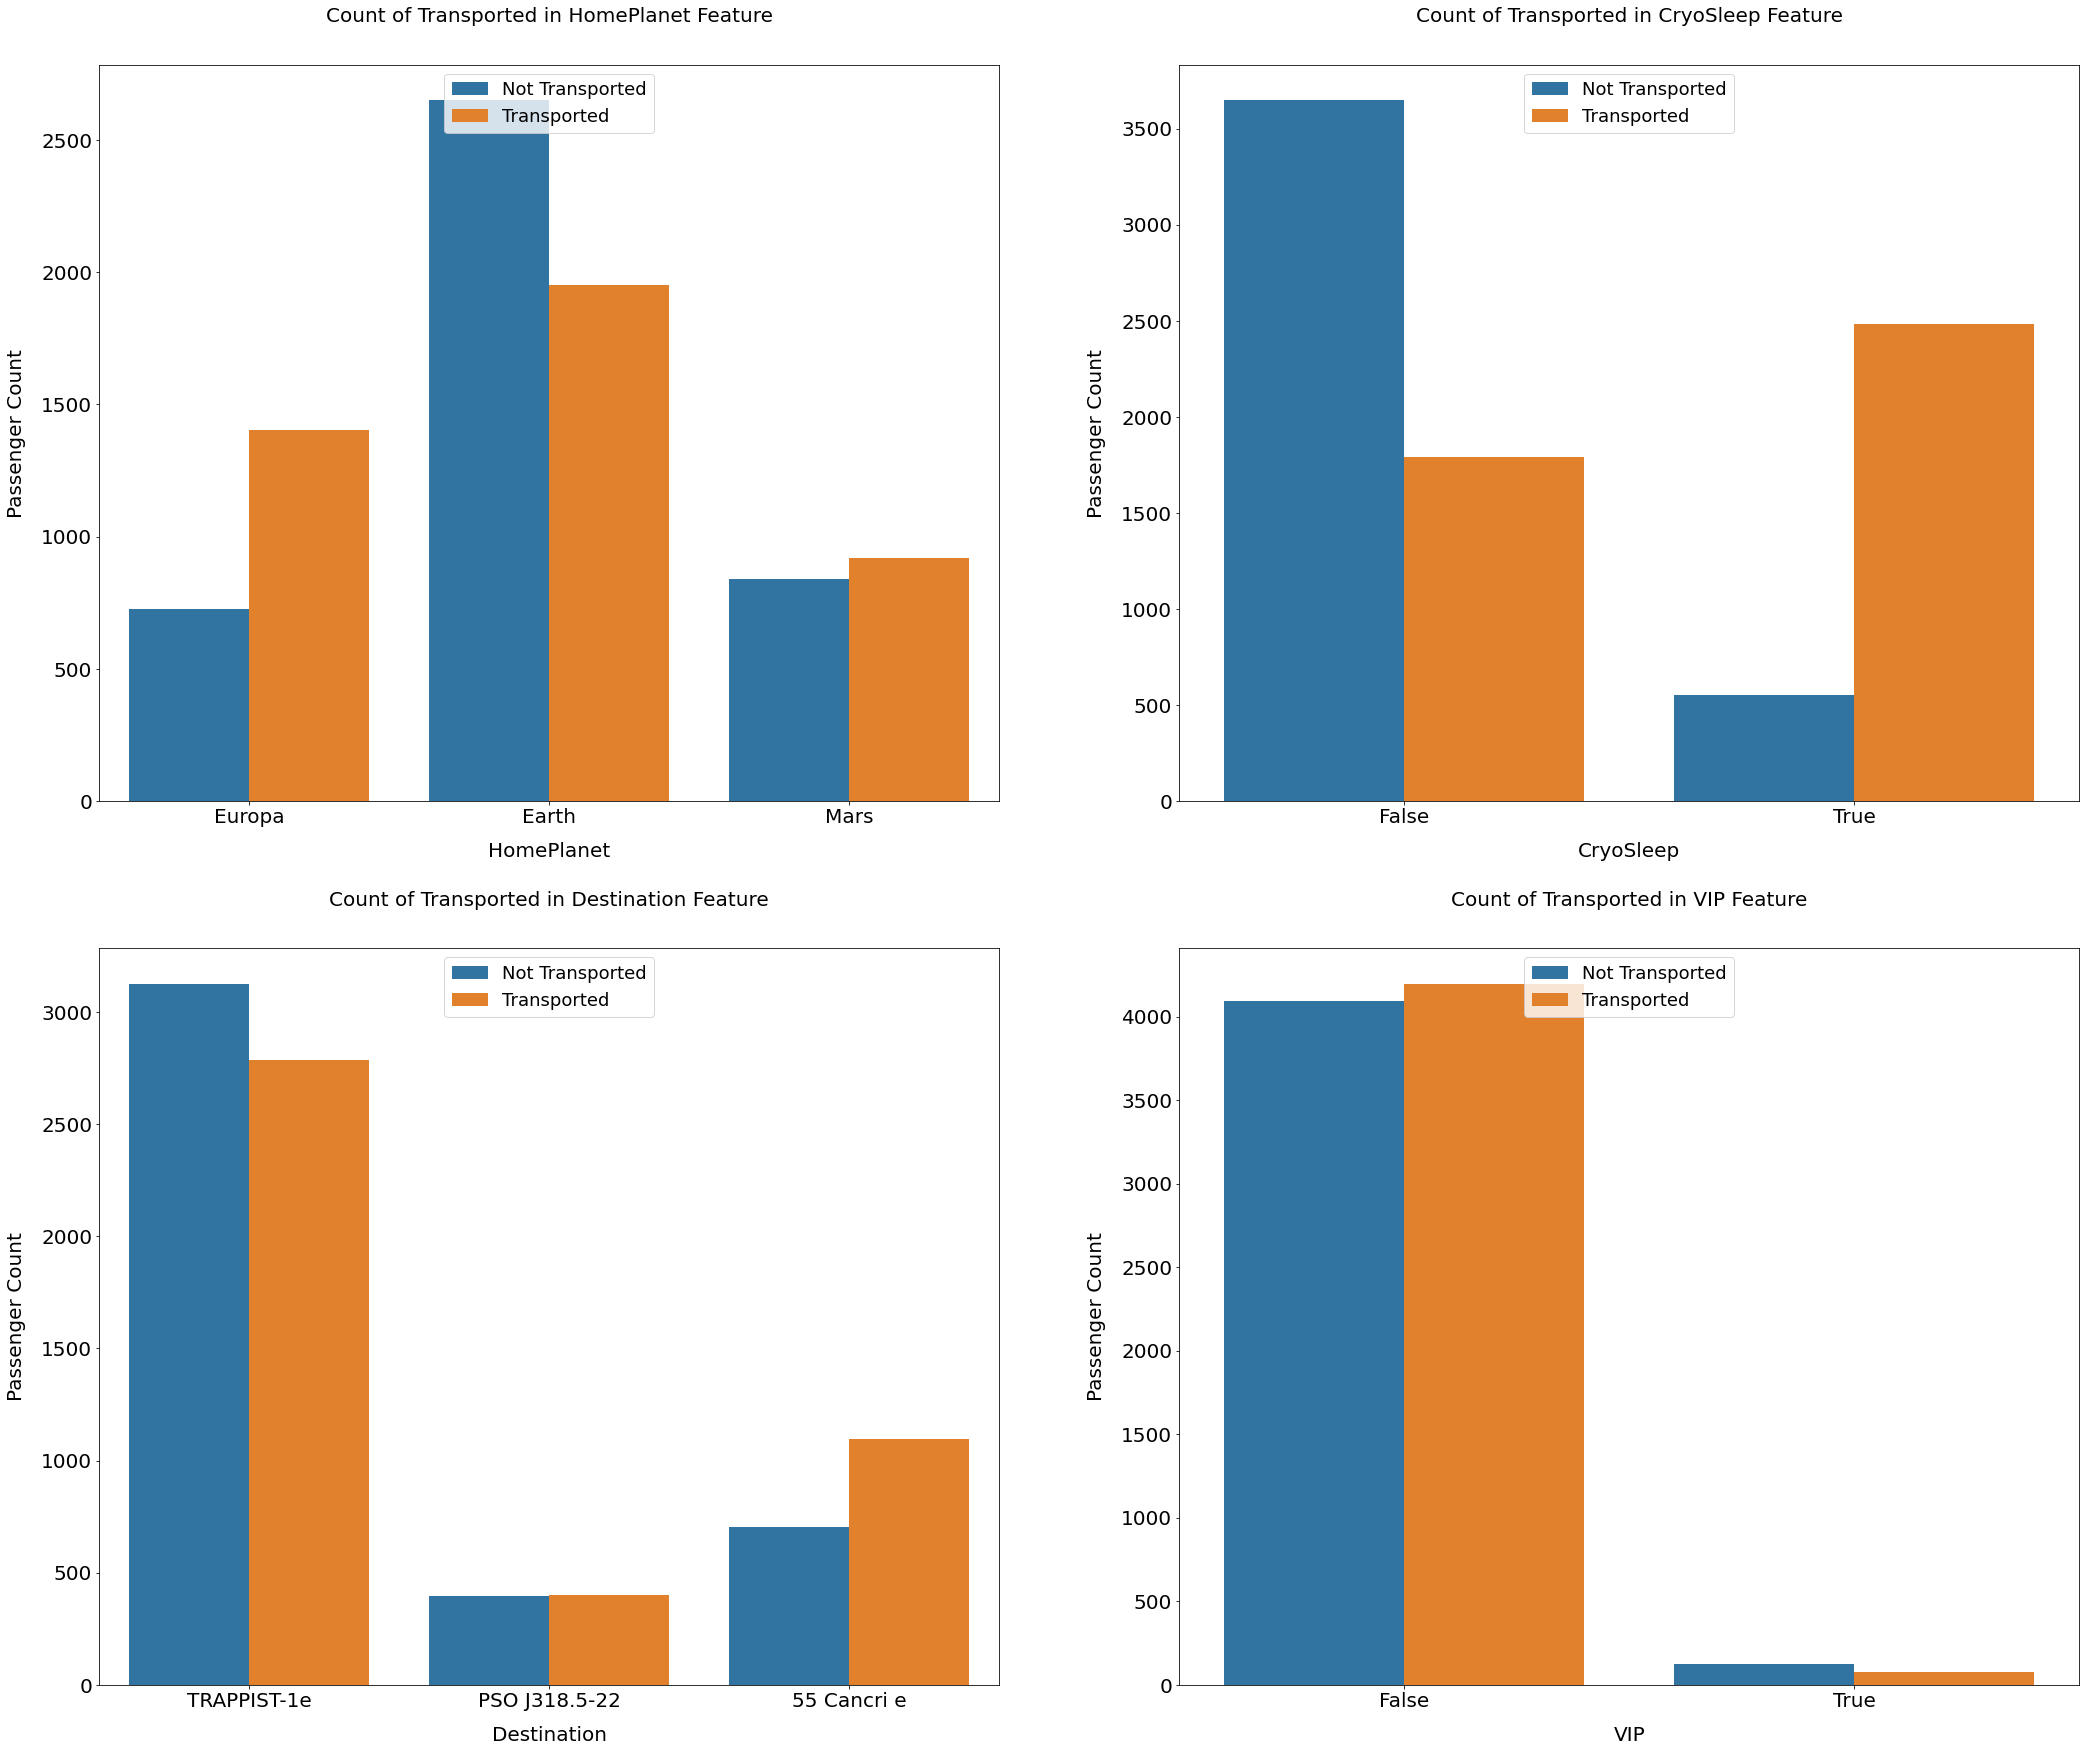

In [120]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Transported', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper center', prop={'size': 18})
    plt.title('Count of Transported in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

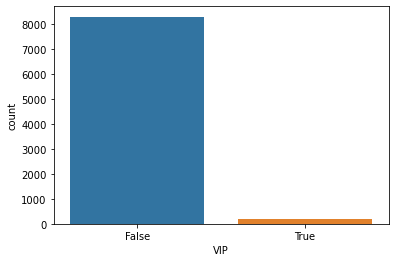

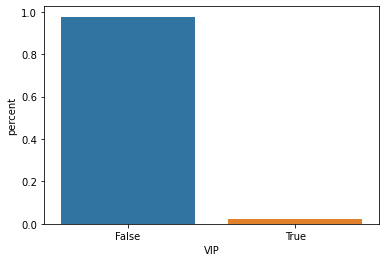

In [121]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# [1] Simple count
sns.countplot(x='VIP', data=df)
plt.show()
# [1B] By percent
pct = df['VIP'].value_counts(normalize=True).reset_index().rename({'index':'VIP','VIP':'percent'}, axis=1)
sns.barplot(x='VIP', y='percent', data=pct)
plt.show()

In [122]:
cs_group = df.groupby('CryoSleep')

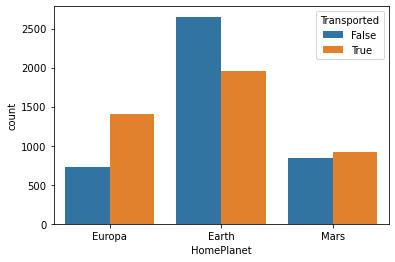

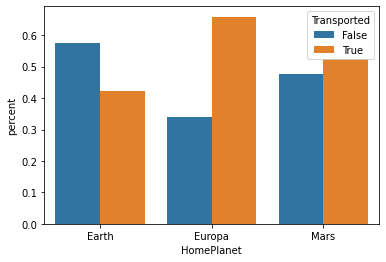

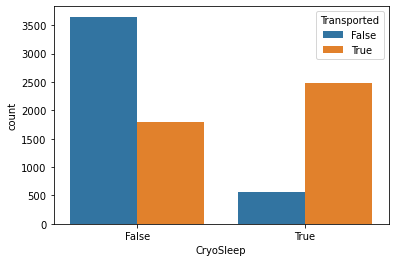

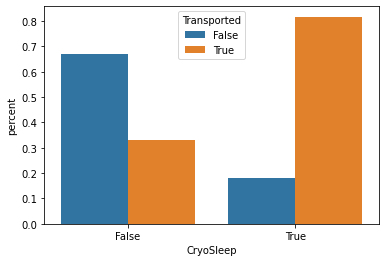

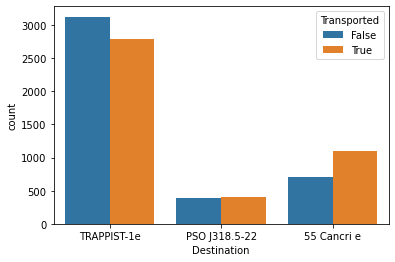

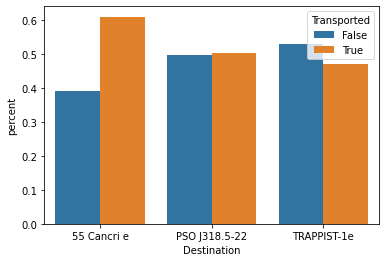

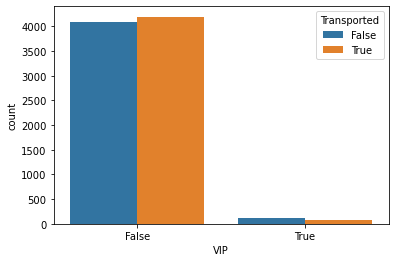

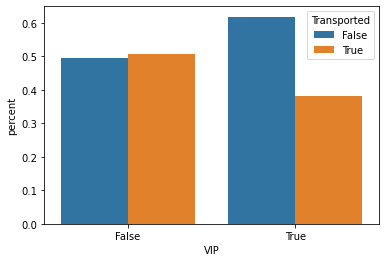

In [123]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for i in features:
    # [2] Two var count
    sns.countplot(x=i, hue='Transported', data=df)
    plt.show()
    # [2b] By percent
    pct2 = (df.groupby([i,'Transported']).size() / df.groupby([i]).size()).reset_index().rename({0:'percent'}, axis=1)
    sns.barplot(x=i, hue='Transported', y='percent', data=pct2)
    plt.show()


<AxesSubplot:>

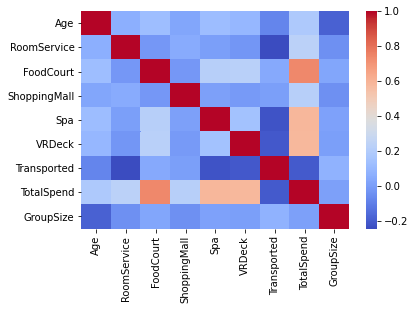

In [124]:
sns.heatmap(df.corr(),cmap='coolwarm')

## Veranderd naar Markdown

non_numeric_features = ['HomePlanet','Destination','CryoSleep','Board','VIP','Transported','Deck']

for feature in non_numeric_features:
    encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
    n = df[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df.index
    encoded_features.append(encoded_df)



# Space Titanic

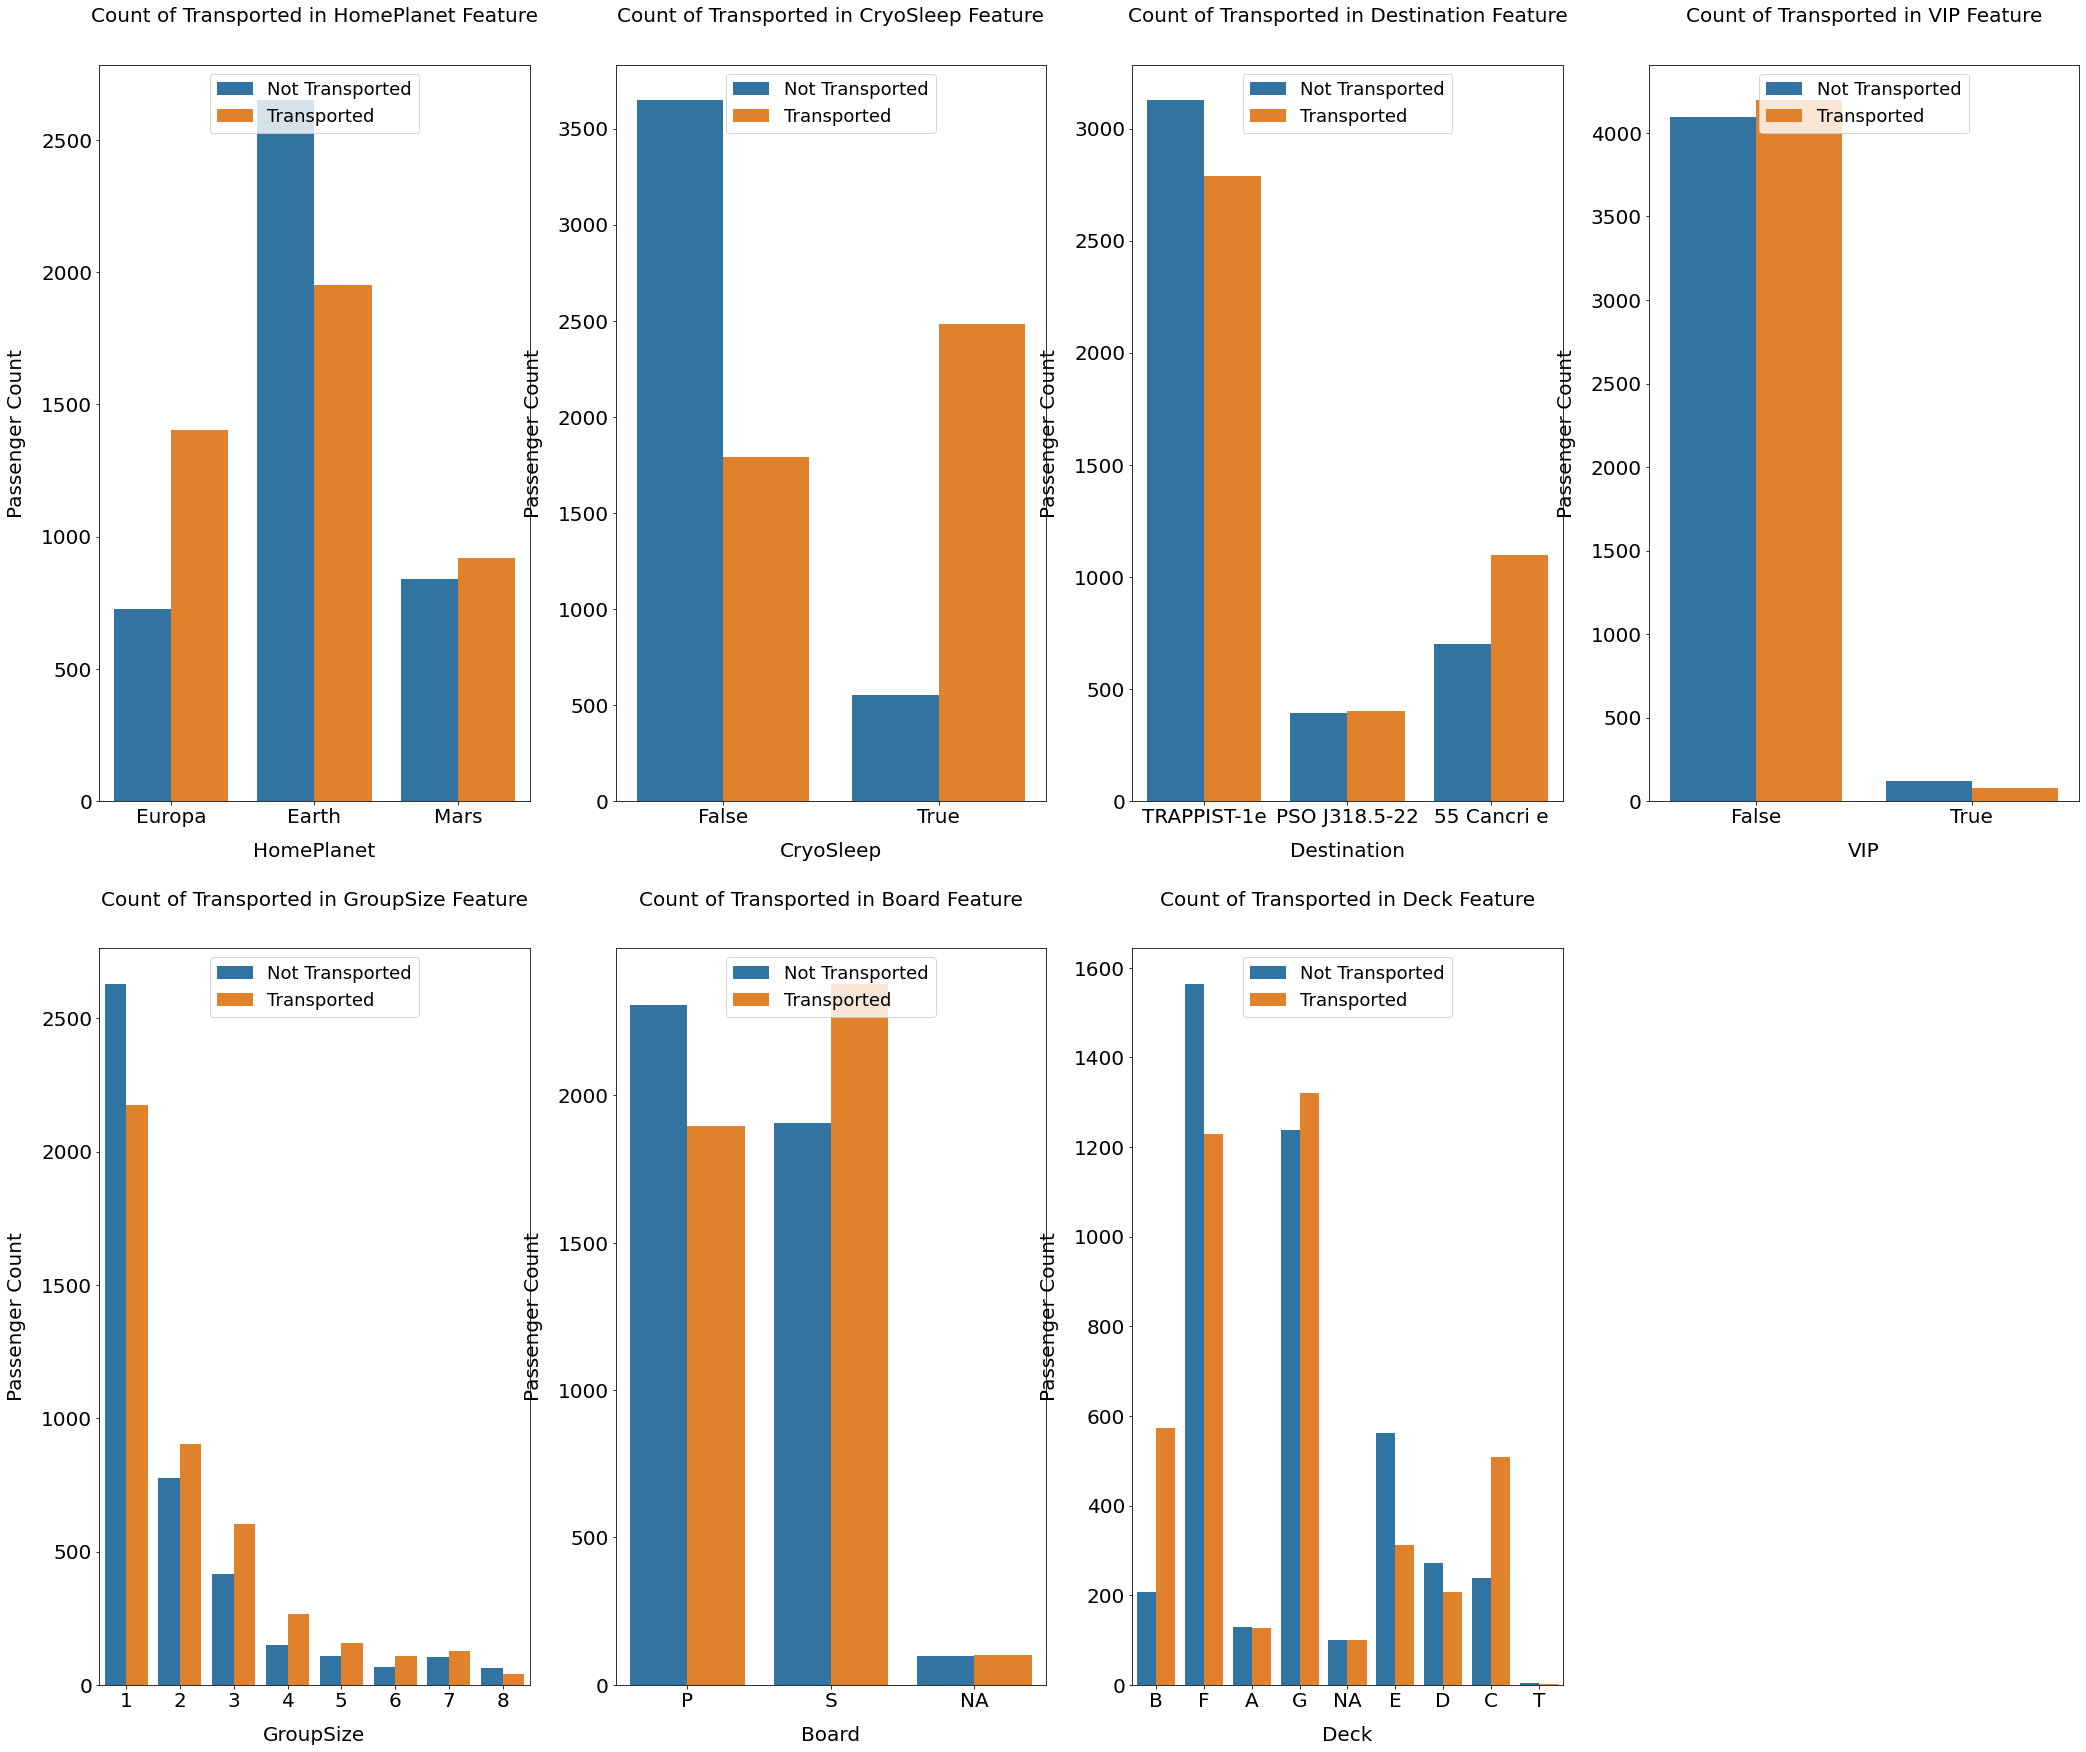

In [125]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'GroupSize', 'Board', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(features, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Transported', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper center', prop={'size': 18})
    plt.title('Count of Transported in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

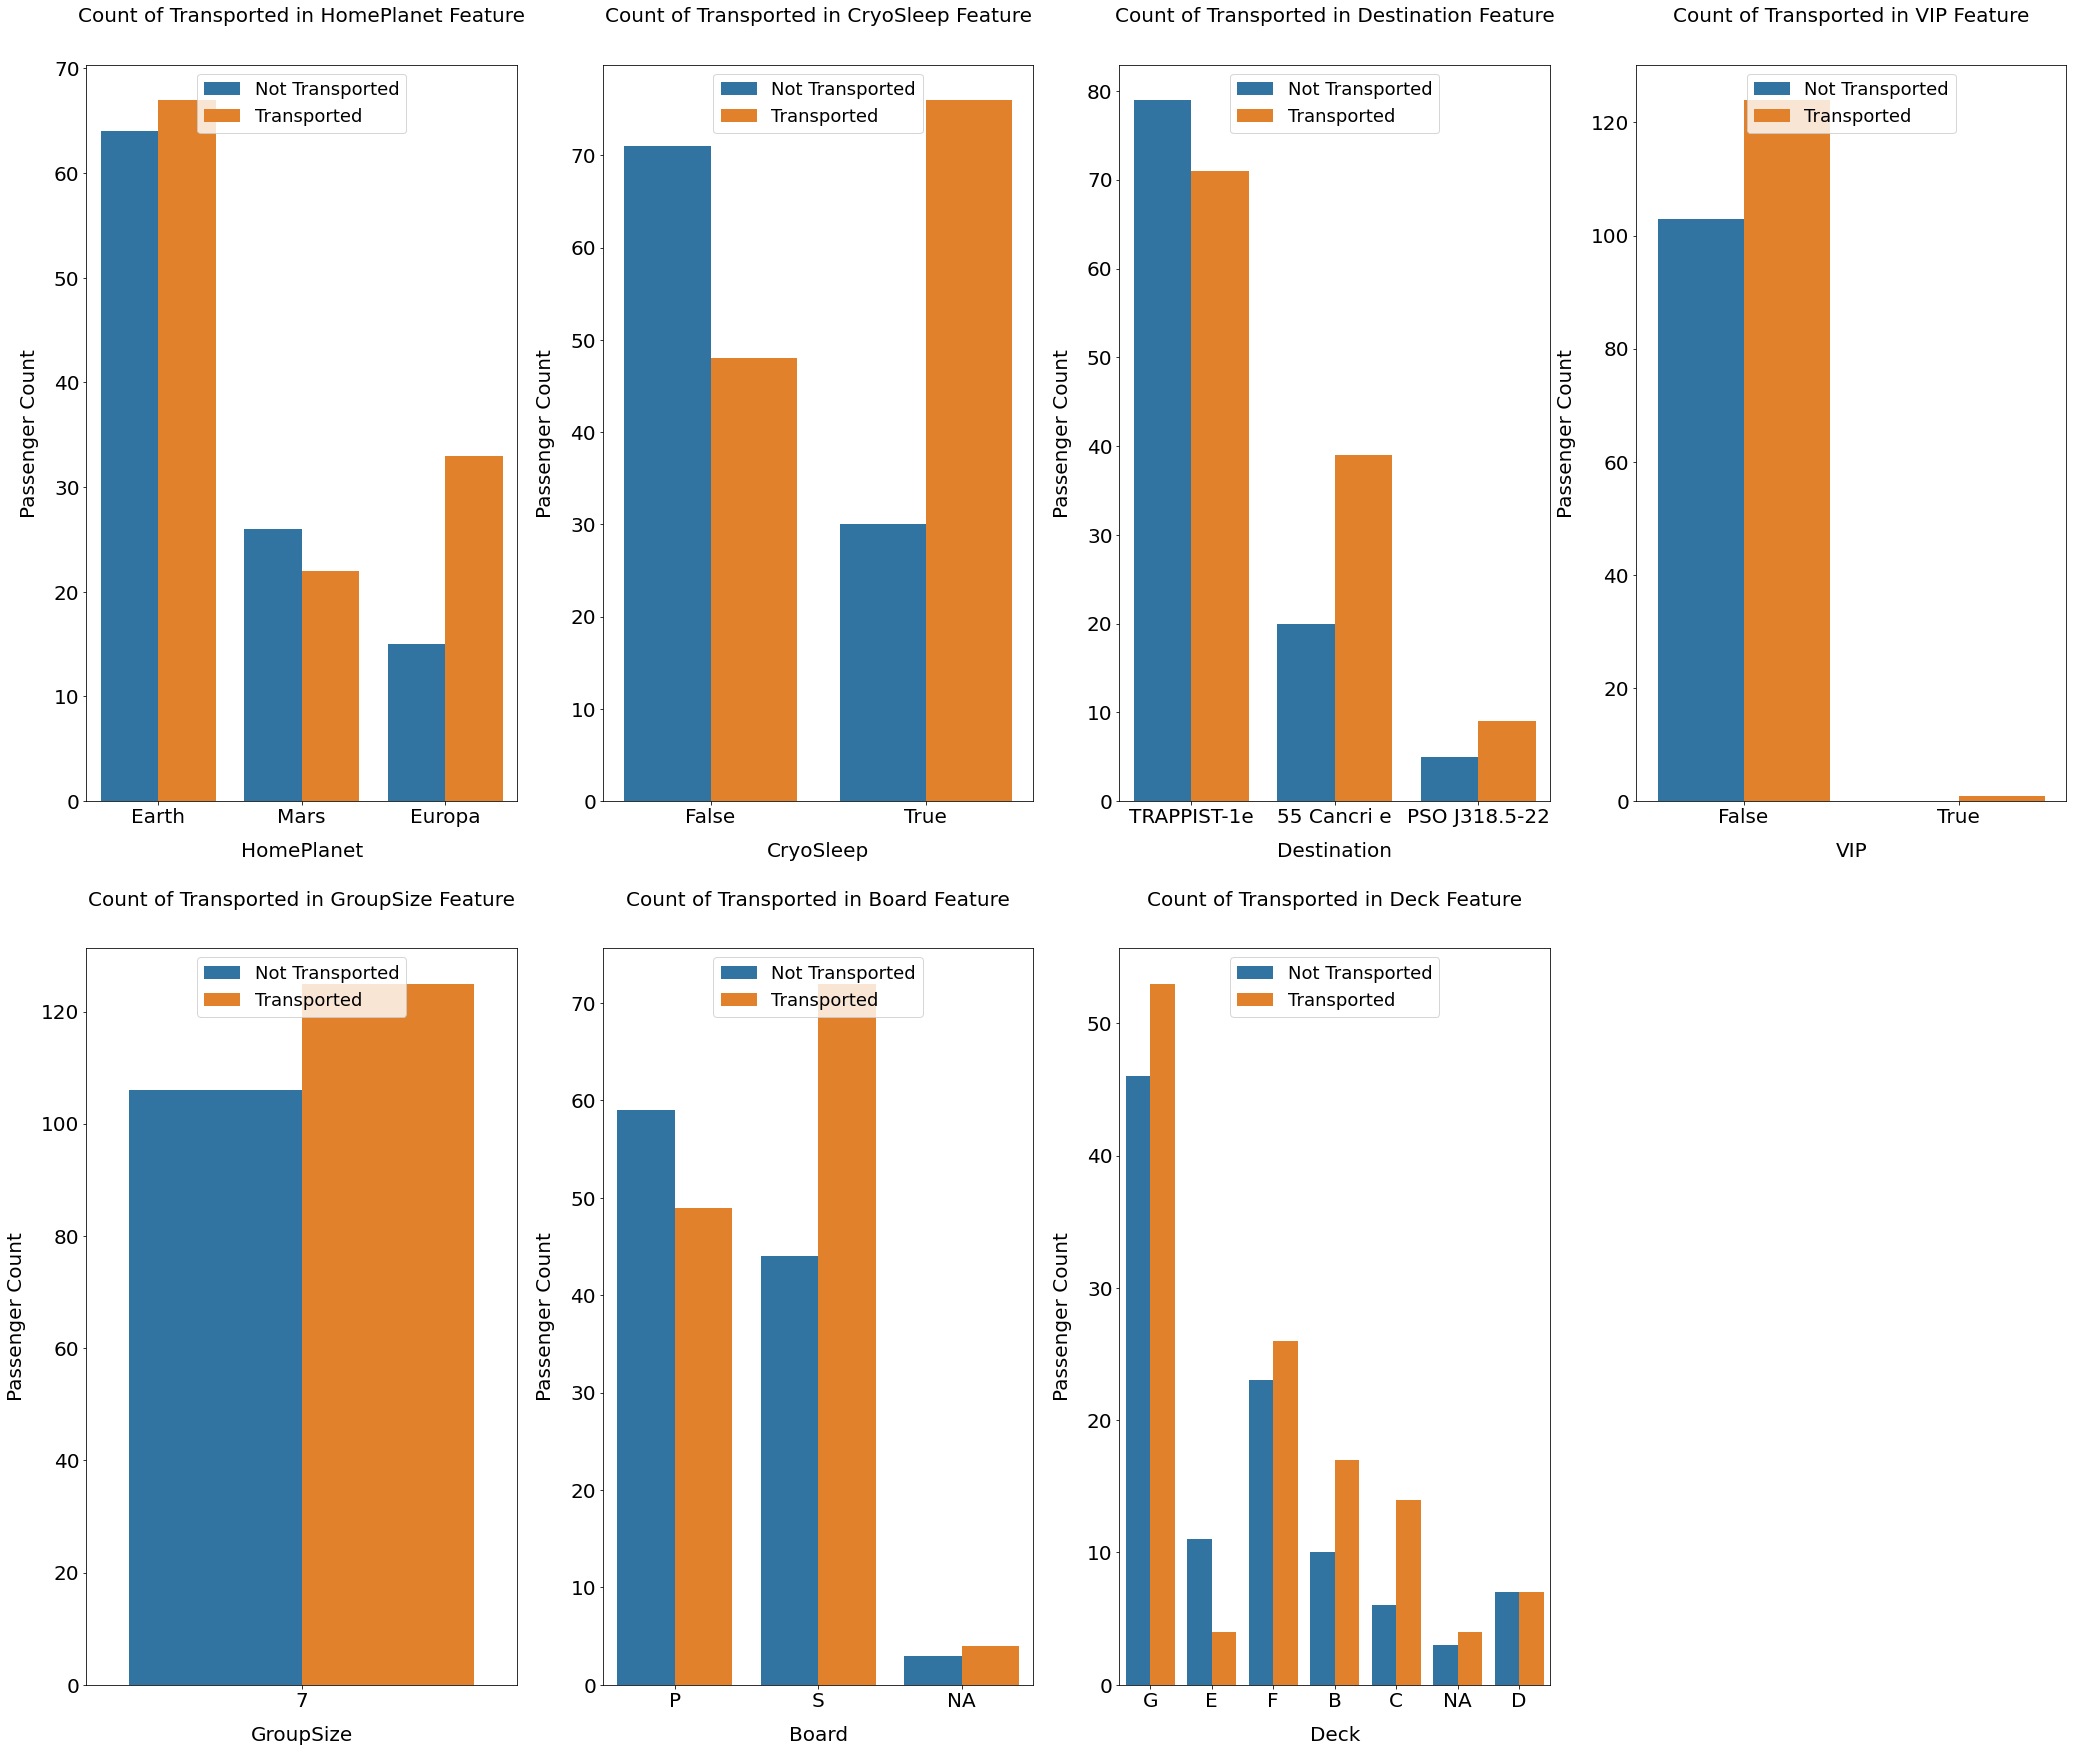

In [126]:

features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'GroupSize', 'Board', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(features, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Transported', data=big_group)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper center', prop={'size': 18})
    plt.title('Count of Transported in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [147]:
# df.head()
# df["CryoSleep"].isna().sum()

# df['CryoSleep'] = df['TotalSpend'].apply(lambda s: 0 if  s>0 else s)

# df["CryoSleep"].isna().sum()

# df["CryoSleep"].isna().sum()
df["CryoSleep"].isna()

# df['CryoSleep2'] = df['TotalSpend'].apply(lambda s: 0 if  s>0 else s)
# df["CryoSleep2"].isna().sum()




0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: bool

In [128]:
# Idee: We kunnen iedereen waarvan Board of Deck NA is, zelfde deck en board geven als mensen met zelfde GroupId
# Weet alleen niet hoe

In [129]:
big_group = df[df['GroupSize'] == 7]

In [130]:
big_group.groupby(['GroupId', "Board"])['Board'].count()

GroupId  Board
0220     P        7
0221     S        7
0378     S        7
0571     P        7
0714     P        7
1148     NA       1
         P        6
1211     S        7
1500     S        7
1709     NA       1
         S        6
1976     S        7
2234     P        7
2347     P        7
2384     NA       1
         S        6
3850     S        7
3862     S        7
3868     S        7
4001     S        7
4172     P        7
4176     P        7
4625     NA       1
         S        6
4661     P        7
5814     S        7
5927     P        7
6020     P        7
6030     S        7
6302     NA       1
         P        6
6334     S        7
6363     NA       1
         P        6
6443     S        7
6787     P        7
8383     P        7
8770     NA       1
         P        6
9157     S        7
Name: Board, dtype: int64

In [189]:
lst = df['GroupId'].unique()[:50]
lst
problems = 0
for i in lst:
    p = 0
    s = 0
    temp = list(df[df['GroupId'] == i]['Board'])
    for j in temp:
        if j == 'P':
            p += 1
        if j == 'S':
            s += 1
    print(j, s)

P 0
S 1
S 2
S 1
P 0
S 2
S 1
P 0
P 0
S 1
P 0
NA 0
P 0
P 0
P 0
P 0
S 6
P 0
S 1
S 1
P 0
P 0
S 1
P 0
S 1
P 0
S 1
S 1
P 0
P 0
P 0
P 0
P 0
S 1
S 1
S 1
S 1
S 3
S 1
S 1
S 1
S 2
P 0
S 3
S 1
S 1
P 0
P 0
S 1
P 0


In [174]:
df[df['CryoSleep'].isna()].groupby(['CryoSleep', 'TotalSpend'], dropna = False)['TotalSpend'].count()

CryoSleep  TotalSpend
NaN        0.0           98
           527.0          1
           595.0          1
           603.0          1
           620.0          1
                         ..
           9133.0         1
           9570.0         1
           9964.0         1
           14028.0        1
           16350.0        1
Name: TotalSpend, Length: 115, dtype: int64

In [183]:
df[df['CryoSleep'] == 0].groupby(['GroupSize', 'TotalSpend'], dropna = False)['TotalSpend'].mean()

GroupSize  TotalSpend
1          0.0              0.0
           1.0              1.0
           10.0            10.0
           11.0            11.0
           21.0            21.0
                          ...  
8          2284.0        2284.0
           2428.0        2428.0
           3043.0        3043.0
           3177.0        3177.0
           5525.0        5525.0
Name: TotalSpend, Length: 3046, dtype: float64